In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

skip = list(range(10))
skip.append(11)
df = pd.ExcelFile('Table_1.2_Primary_Energy_Production_by_Source.xlsx').parse('Annual Data', skiprows = skip)
df = df[df.columns[1:6]]
df.columns = ['Coal','Natural_gas_dry','Crude_oil','Natural_gas_liquids','Total']
for column in df:
    df[column] = df[column] / df[df.columns[4]]
df = df.drop(['Total'],axis=1)

In [2]:
skip = list(range(10))
skip.append(11)
df = pd.ExcelFile('Table_1.2_Primary_Energy_Production_by_Source.xlsx').parse('Annual Data', skiprows = skip)
df = df[df.columns[1:5]]
df.columns = ['Coal','Natural_gas_dry','Crude_oil','Natural_gas_liquids']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


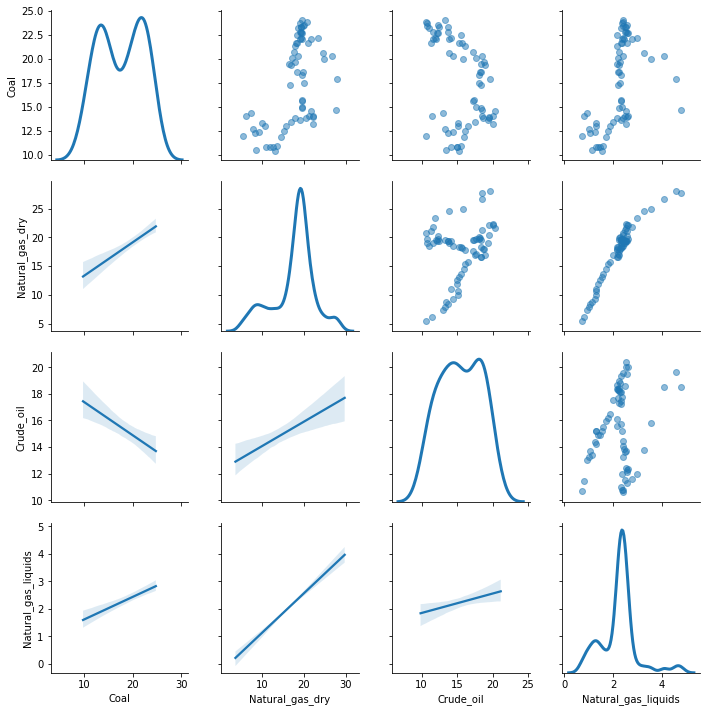

In [3]:
g = sns.PairGrid(df,diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                         Coal  Natural_gas_dry  Crude_oil  Natural_gas_liquids
Coal                 1.000000         0.527331  -0.385738             0.491547
Natural_gas_dry      0.527331         1.000000   0.312718             0.947231
Crude_oil           -0.385738         0.312718   1.000000             0.272838
Natural_gas_liquids  0.491547         0.947231   0.272838             1.000000


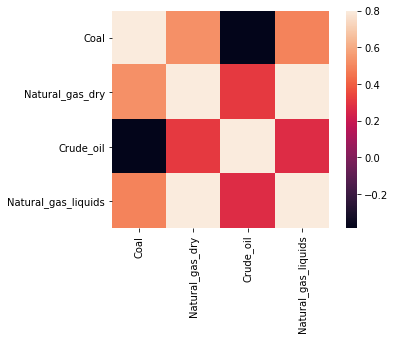

In [4]:
fuelmat = df.corr()
print(fuelmat)

sns.heatmap(fuelmat, vmax = 0.8, square = True)
plt.show()

(array([ 6.,  6.,  5., 20., 24.,  2.,  2.,  0.,  1.,  2.]),
 array([0.713799 , 1.1194293, 1.5250596, 1.9306899, 2.3363202, 2.7419505,
        3.1475808, 3.5532111, 3.9588414, 4.3644717, 4.770102 ]),
 <a list of 10 Patch objects>)

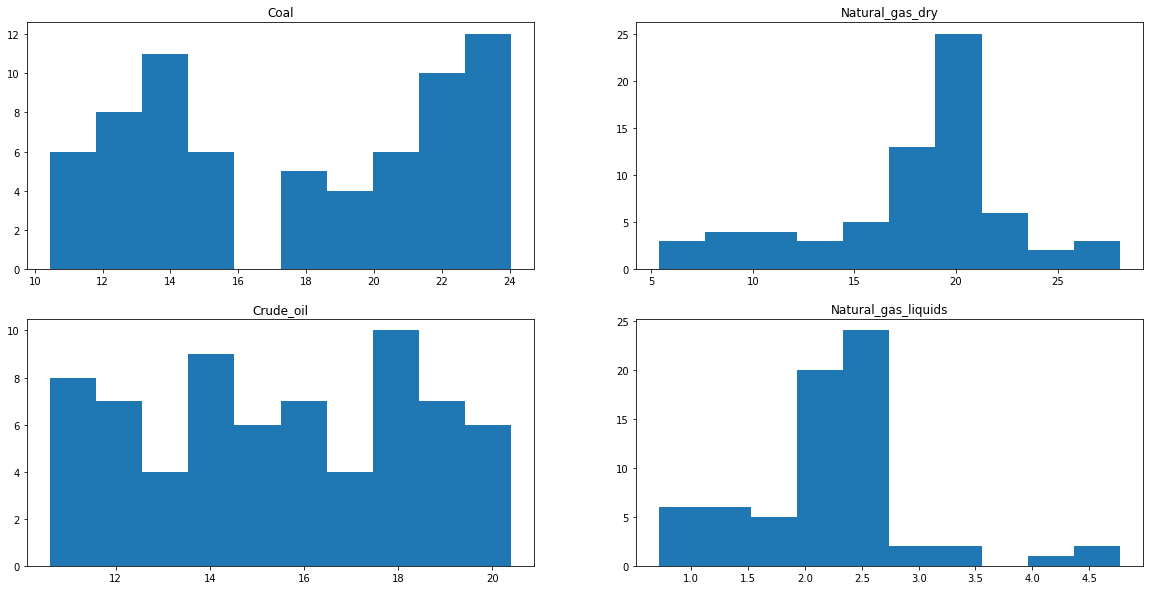

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.title('Coal')
plt.hist(df['Coal'])
plt.subplot(2, 2, 2)
plt.title('Natural_gas_dry')
plt.hist(df['Natural_gas_dry'])
plt.subplot(2, 2, 3)
plt.title('Crude_oil')
plt.hist(df['Crude_oil'])
plt.subplot(2, 2, 4)
plt.title('Natural_gas_liquids')
plt.hist(df['Natural_gas_liquids'])

Text(0.5,1,'Raw data')

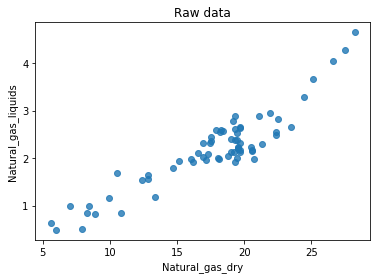

In [6]:
t = sns.regplot(
    'Natural_gas_dry',
    'Natural_gas_liquids',
    df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axes.set_title('Raw data')

Text(0.5,1,'Standardized data')

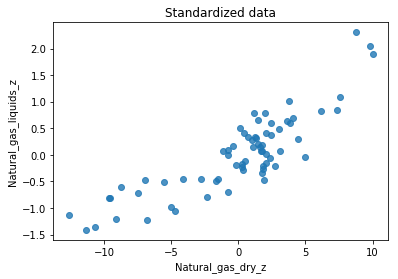

In [7]:
# standardizes data so that 0,0 is in the middle

df['Natural_gas_dry_z'] = df['Natural_gas_dry'] - df['Natural_gas_dry'].mean()
df['Natural_gas_liquids_z'] = df['Natural_gas_liquids'] - df['Natural_gas_liquids'].mean()
t = sns.regplot(
    'Natural_gas_dry_z',
    'Natural_gas_liquids_z',
    df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axes.set_title('Standardized data')

Text(0.5,1,'Log Scale')

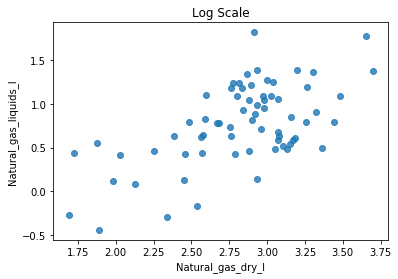

In [8]:
df['Natural_gas_dry_l'] = np.log(df['Natural_gas_dry'])
df['Natural_gas_liquids_l'] = np.log(df['Natural_gas_liquids'])
t = sns.regplot('Natural_gas_dry_l', 'Natural_gas_liquids_l', df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axes.set_title('Log Scale')

Text(0.5,1,'Inverse')

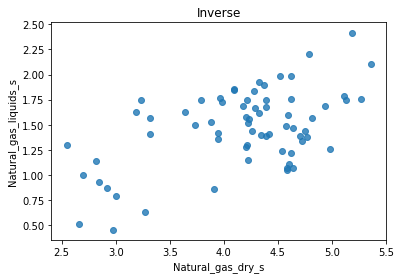

In [9]:
df['Natural_gas_dry_s'] = np.sqrt(df['Natural_gas_dry'])
df['Natural_gas_liquids_s'] = np.sqrt(df['Natural_gas_liquids'])
t = sns.regplot('Natural_gas_dry_s', 'Natural_gas_liquids_s', df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axes.set_title('Inverse')

In [10]:
sklearn_pca = PCA(n_components = 5)
sklearn_pca.fit_transform(df_sources_subset_scaled)
print("The percentage of total variance in subset of said data explained by each component from Sklearn PCA\n", sklearn_pca.explained_variance_ratio_)

NameError: name 'df_sources_subset_scaled' is not defined